## Churn Prediction using Scikit-Learn

**Link to Dataset**: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?datasetId=66163&sortBy=voteCount 



**Details about the dataset**:

It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

**Variables**:

RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [ ]:
#importing necessary libraries and files.
from google.colab import files

import numpy as np
import pandas as pd
import missingno as mso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
files.upload();

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
#fitting into a dataframe and checking the results.
cust = pd.read_csv("/content/Churn_Modelling.csv")
cust.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let us explore our dataset.

In [ ]:
cust.shape

(10000, 14)

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
cust.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

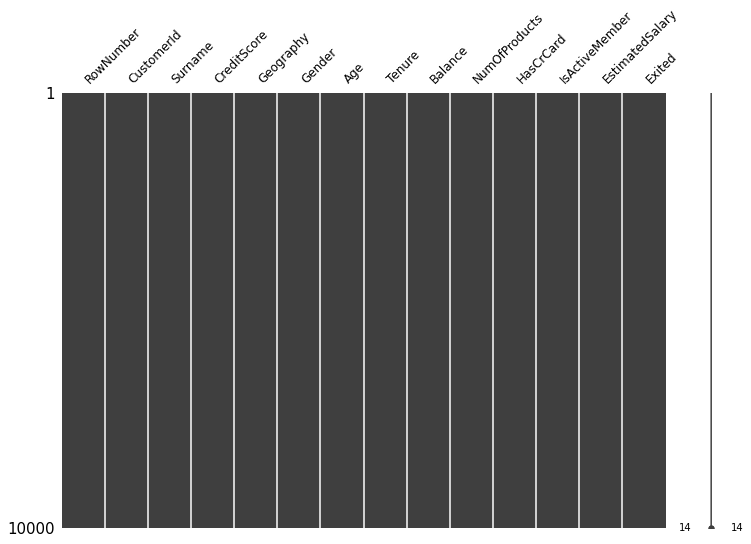

In [ ]:
mso.matrix(cust, figsize=(12,8), fontsize=12);

Since there are **no missing values**, we can proceed

In [ ]:
cust = cust.drop(["RowNumber", "CustomerId", "Surname"], axis=1) #dropping unnecessary columns

Now we convert the dataset into features and labels


In [ ]:
X = cust.drop(['Exited'], axis=1)

y = cust['Exited']

In [ ]:
#Encoding object columns

col_trans = ColumnTransformer([("One Hot",
                                 OneHotEncoder(),
                                 ["Geography", "Gender"])],
                                 remainder="passthrough")

transformed_X = col_trans.fit_transform(X)

transformed_X = pd.DataFrame(transformed_X)


In [ ]:
#Now we split the datasets intro three parts

train_X, test_X, train_y, test_y = train_test_split(transformed_X, y, test_size=0.15, random_state=42)

train2_X, val_X, train2_y, val_y = train_test_split(train_X, train_y, test_size=0.15, random_state=42)

In [ ]:
model2 = RandomForestClassifier(n_estimators=100)

model2.fit(train2_X, train2_y)

y_preds = model2.predict(val_X)
y_true = val_y

np.mean(y_preds == y_true)

0.8658823529411764

In [ ]:
def evaluate_preds(val_y, y_preds):
  """
  Evaluates prediction values by comparing them to the Validation set values
  """
  accuracy = accuracy_score(val_y, y_preds)
  precision = precision_score(val_y, y_preds)
  recall = recall_score(val_y, y_preds)
  f1 = f1_score(val_y, y_preds)
  metric_dict = {'accuracy' : round(accuracy,2),
                 'precision' : round(precision,2),
                 'recall' : round(recall,2),
                 'f1' : round(f1,2)}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"f1: {f1:.2f}")

  return metric_dict

In [ ]:
evaluate_preds(val_y, y_preds)

Acc: 86.59%
Precision: 0.82
Recall: 0.50
f1: 0.62


{'accuracy': 0.87, 'f1': 0.62, 'precision': 0.82, 'recall': 0.5}

In [ ]:
param_grid = {"n_estimators" : [50, 100, 250, 500, 1000, 2000],
              "max_depth" : [None, 5, 10, 15, 20, 25],
              "max_features" : ["auto", "sqrt"],
              "min_samples_split" : [2, 4, 6],
              "min_samples_leaf" : [1, 2, 4]}

RS_clf = RandomizedSearchCV(estimator = model2,
                            param_distributions=param_grid,
                            n_iter = 20,
                            cv = 5,
                            verbose=2)

RS_clf.fit(train2_X, train2_y);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

In [ ]:
RS_clf.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1000}

In [ ]:
rs_y_preds = RS_clf.predict(val_X)

rs_metrics = evaluate_preds(val_y, rs_y_preds)

Acc: 86.90%
Precision: 0.84
Recall: 0.50
f1: 0.62


In [21]:
# We save our model 
import pickle
pickle.dump(RS_clf, open("RanForClss_Churn_model", "wb"))

In [23]:
#Now we check how the model performs on the test data

loaded_model = pickle.load(open("RanForClss_Churn_model", "rb"))

new_y_preds = loaded_model.predict(test_X)
evaluate_preds(test_y, new_y_preds)

Acc: 86.40%
Precision: 0.75
Recall: 0.45
f1: 0.57


{'accuracy': 0.86, 'f1': 0.57, 'precision': 0.75, 'recall': 0.45}

###Report: - 
The procedure followed in analyzing this dataset-

1. Imported the dataset obtained from kaggle and checked the variable datatypes.
2. The dataset was engineered to suit our needs by dropping unnecessary columns and encoding the required ones
3. The dataset was split into training, validation and test sets in the ratio of 14:3:3 respectively.
4. The model selected in this instance was RandomForestClassifier. 
5. Using RandomSearchCV, optimal hyperparameters were obtained and the model thus created was applied to the test set. 
6. The metrics obtained from the above are: - 

    Acc: 86.40%,

    Precision: 0.75,

    Recall: 0.45,

    f1: 0.57